In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np

In [2]:
import tensorboard as tb
from scipy import stats
import seaborn as sns

In [3]:
tb.__version__

'2.14.0'

In [4]:
import os
import pandas as pd
from tensorflow.python.summary.summary_iterator import summary_iterator


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# """
# code modified from this gist on github: https://gist.github.com/laszukdawid/62656cf7b34cac35b325ba21d46ecfcd
# blog post here: https://laszukdawid.com/blog/2021/01/26/parsing-tensorboard-data-locally/
# """

# def convert_tb_data(root_dir, sort_by=None):
#     """Convert local TensorBoard data into Pandas DataFrame.
    
#     Function takes the root directory path and recursively parses
#     all events data.    
#     If the `sort_by` value is provided then it will use that column
#     to sort values; typically `wall_time` or `step`.
    
#     *Note* that the whole data is converted into a DataFrame.
#     Depending on the data size this might take a while. If it takes
#     too long then narrow it to some sub-directories.
    
#     Paramters:
#         root_dir: (str) path to root dir with tensorboard data.
#         sort_by: (optional str) column name to sort by.
    
#     Returns:
#         pandas.DataFrame with [wall_time, name, step, value] columns.
    
#     """

#     def convert_tfevent(filepath):
#         return pd.DataFrame([
#             parse_tfevent(e) for e in summary_iterator(filepath) if len(e.summary.value)
#         ])

#     def parse_tfevent(tfevent):
#         return dict(
#             wall_time=tfevent.wall_time,
#             name=tfevent.summary.value[0].tag,
#             step=tfevent.step,
#             value=float(tfevent.summary.value[0].simple_value),
#         )
    
#     columns_order = ['exp_step', 'wall_time', 'name', 'step', 'value']
    
#     out = []
#     for exp_dir in os.listdir(root_dir):
#         exp_dir_path = os.path.join(root_dir, exp_dir)
#         # print(exp_dir_path)
#         # print("all: ", os.listdir(exp_dir_path))
#         filenames = list(filter(lambda x: os.path.isfile(os.path.join(exp_dir_path, x)), os.listdir(exp_dir_path)))
#         # print("filtered: ", filenames)
#         for filename in filenames:
#             # print(filename)
#             if "events.out.tfevents" not in filename:
#                 continue
#             file_full_path = os.path.join(root_dir, exp_dir, filename)
#             file_df = convert_tfevent(file_full_path)
#             file_df['exp_step'] = exp_dir
#             out.append(file_df)
#     # print(out)

#     # Concatenate (and sort) all partial individual dataframes
#     all_df = pd.concat(out)[columns_order]
#     if sort_by is not None:
#         all_df = all_df.sort_values(sort_by)
        
#     return all_df.reset_index(drop=True)



In [5]:
# dir_path = "log/coco/transpose_r_mod/osiris/exp9/"
# # exp_name = "exp9_step1_scalingBN_2024-07-30-11-22"
# exp_name = ""
# df9 = convert_tb_data(f"{dir_path}/{exp_name}")

# print(df9)

In [6]:

# dir_path = "log/coco/transpose_r_mod/osiris/exp10/"
# # exp_name = "exp9_step1_scalingBN_2024-07-30-11-22"
# exp_name = ""
# df = convert_tb_data(f"{dir_path}/{exp_name}")

# print(df)

In [13]:
exp9_res =  pd.read_csv("exp9_results.csv", index_col=0)
exp10_res = pd.read_csv("exp10_results.csv", index_col=0)

In [10]:
pd.unique(exp10_res['exp_step'])

array(['exp10_step1_finetune_2024-08-05-22-50',
       'exp10_step1_scalingBN_2024-08-05-22-39',
       'exp10_step2_finetune_2024-08-06-09-25',
       'exp10_step2_scalingBN_2024-08-05-23-35',
       'exp10_step3_finetune_2024-08-06-11-24',
       'exp10_step3_scalingBN_2024-08-06-11-11'], dtype=object)

In [11]:
pd.unique(exp10_res["name"])

array(['train_loss', 'train_acc', 'valid_loss', 'valid_acc'], dtype=object)

57
228
57
228
57
228
57
228
57
228
57
228


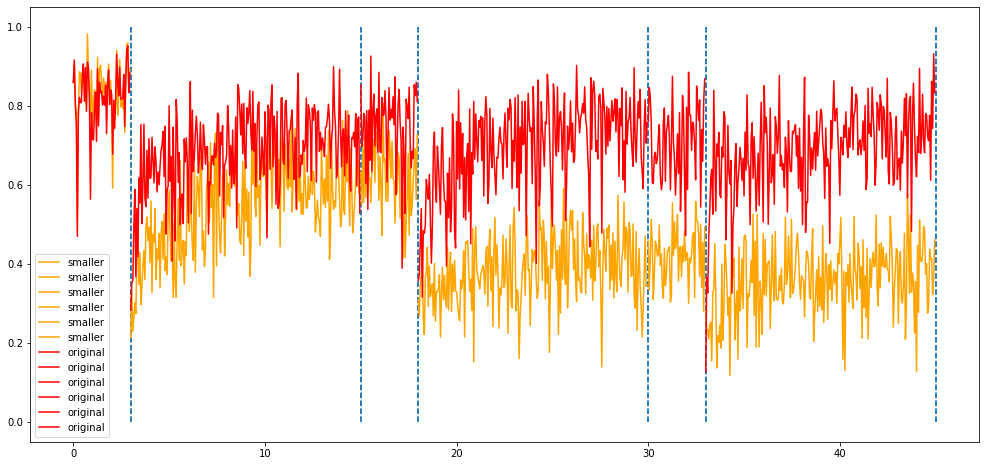

In [16]:
fig, axs = plt.subplots (figsize=(17, 8))
offset = 0
exp_num = "exp10"
for step in range(1,4):
    for stage in ["scalingBN", "finetune"]:
        train_acc = exp10_res[exp10_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        
        
        axs.plot(train_acc.step/(228/12.0) + offset, train_acc.value, color="orange", label="smaller")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        axs.vlines([offset], 0,1, linestyles='dashed')

offset = 0
exp_num = "exp9"
for step in range(1,4):
    for stage in ["scalingBN", "finetune"]:
        train_acc = exp9_res[exp9_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        
        
        axs.plot(train_acc.step/(228/12.0) + offset, train_acc.value, color="red", label="original")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        axs.vlines([offset], 0,1, linestyles='dashed')
axs.legend()

0 0.8357089538323251
57
3 0.5457129635962478
228
15 0.6179568176729637
57
18 0.38303181398333164
228
30 0.4221804507991724
57
33 0.35703515526103347
228
57
228
57
228
57
228


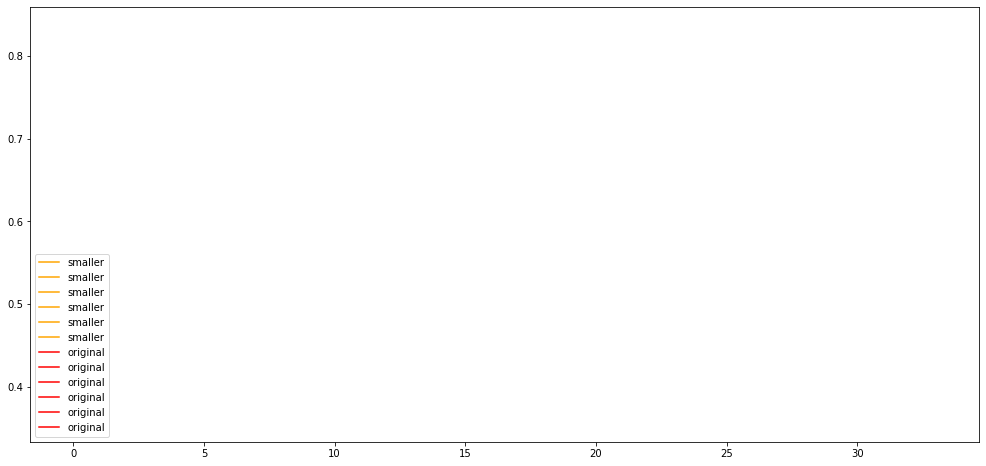

In [23]:
fig, axs = plt.subplots (figsize=(17, 8))
offset = 0
exp_num = "exp10"
for step in range(1,4):
    for stage in ["scalingBN", "finetune"]:
        train_acc = exp10_res[exp10_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        # print("train_acc: ", train_acc)
        mean_train_acc = np.mean(train_acc['value'])
        print(offset, mean_train_acc)
        
        axs.plot(offset, mean_train_acc, color="orange", label="smaller")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        # axs.vlines([offset], 0,1, linestyles='dashed')

offset = 0
exp_num = "exp9"
for step in range(1,4):
    for stage in ["scalingBN", "finetune"]:
        train_acc = exp9_res[exp9_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        mean_train_acc = np.mean(train_acc['value'])
        
        axs.plot(offset, mean_train_acc, color="red", label="original")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        # axs.vlines([offset], 0,1, linestyles='dashed')
axs.legend()

3
12
3
12


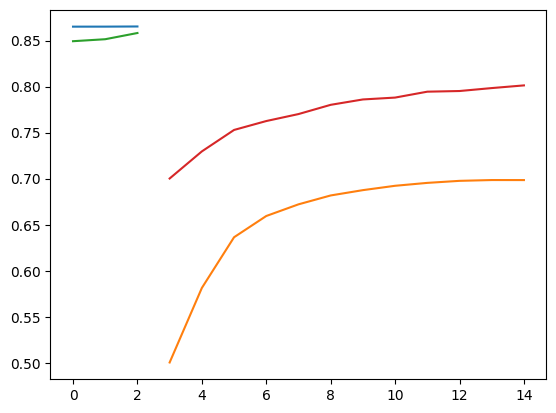

In [18]:
offset = 0
exp_num = "exp10"
for step in range(1,2):
    for stage in ["scalingBN", "finetune"]:
        train_acc = df[df.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "valid_acc"]
        
        
        plt.plot(train_acc.step + offset, train_acc.value)
        offset += len(train_acc)
        print(len(train_acc))
        # plt.vlines([offset], 0,1, linestyles='dashed')

offset = 0
exp_num = "exp9"
for step in range(1,2):
    for stage in ["scalingBN", "finetune"]:
        train_acc = df9[df9.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "valid_acc"]
        
        
        plt.plot(train_acc.step + offset, train_acc.value)
        offset += len(train_acc)
        print(len(train_acc))
        # plt.vlines([offset], 0,1, linestyles='dashed')

57
228
0
0


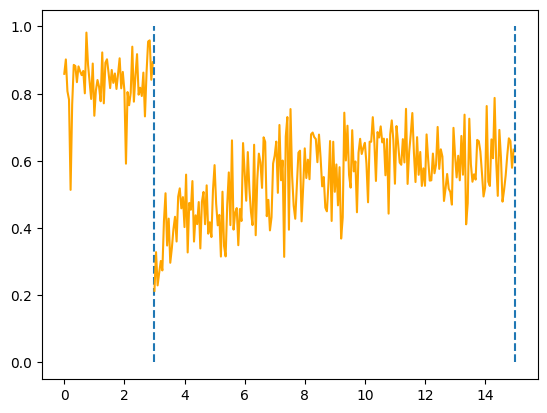

In [20]:
offset = 0
exp_num = "exp10"
for step in range(1,2):
    for stage in ["scalingBN", "finetune"]:
        train_acc = df[df.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "train_acc"]
        
        
        plt.plot(train_acc.step/(228/12.0) + offset, train_acc.value, color="orange")
        if stage == 'scalingBN':
            offset += 3
        elif stage == 'finetune':
            offset += 12
        print(len(train_acc))
        plt.vlines([offset], 0,1, linestyles='dashed')


offset = 0
exp_num = "exp9"
for step in range(1,2):
    for stage in ["scalingBN", "finetune"]:
        train_acc = df[df.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        train_acc = train_acc[train_acc.name == "valid_acc"]
        
        
        plt.plot(train_acc.step + offset, train_acc.value, color = 'blue')
        offset += len(train_acc)
        print(len(train_acc))
        # plt.vlines([offset], 0,1, linestyles='dashed')

12
12
12


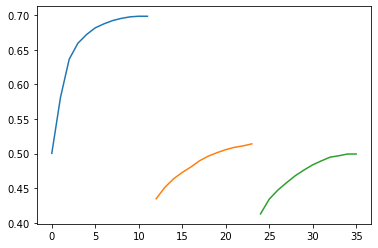

In [14]:
offset = 0
exp_num = "exp10"
for step in range(1,4):
    for stage in [ "finetune"]:
        val_acc = exp10_res[exp10_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        val_acc = val_acc[val_acc.name == "valid_acc"]
        
        
        plt.plot(val_acc.step + offset, val_acc.value)
        offset += len(val_acc)
        print(len(val_acc))

In [16]:
exp10_val_acc = [0.75]
for step in range(1,4):
    for stage in ["finetune"]:
        val_acc = exp10_res[exp10_res.exp_step.str.contains(f"{exp_num}_step{step}_{stage}")]
        val_acc = val_acc[val_acc.name == "valid_acc"]
        print(val_acc['value'][-1:])
        exp10_val_acc.append(val_acc['value'][-1:].to_numpy()[0])
exp10_val_acc

479    0.698479
Name: value, dtype: float64
1079    0.514119
Name: value, dtype: float64
1679    0.499452
Name: value, dtype: float64


[0.75, 0.6984791159629822, 0.5141187906265259, 0.4994523525238037]

In [18]:
exp10_model_size_iter = [4735825, 4560818, 4401660, 4264809]


In [19]:
exp10_sparsity = []
for i in range(len(exp10_model_size_iter)):
    exp10_sparsity.append(1 - exp10_model_size_iter[i] / exp10_model_size_iter[0])

Text(0.5, 1.0, 'Performance vs Sparsity - strategy 1 and 2')

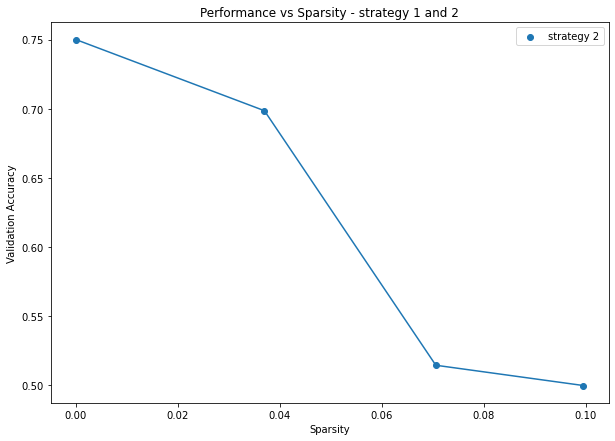

In [20]:
fig, axs = plt.subplots(figsize=(10,7))
# axs.scatter(exp4_sparsity, exp4_model_acc_iter, label="strategy 1")
# axs.plot(exp4_sparsity, exp4_model_acc_iter)
axs.scatter(exp10_sparsity, exp10_val_acc, label="strategy 2")
axs.plot(exp10_sparsity, exp10_val_acc)
axs.legend()
axs.set_ylabel("Validation Accuracy")
axs.set_xlabel("Sparsity")
axs.set_title("Performance vs Sparsity - strategy 1 and 2")